In [38]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.decomposition import PCA
import datetime
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from ann_visualizer.visualize import ann_viz;
from PIL import Image
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [22]:
# Importing the dataset
df = pd.read_csv('./Dataset/toydata.csv')
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V248,V249,V250,V251,V252,V253,V254,V255,V256,y
0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,0.510,-0.213,-1.000,...,0.666,0.301,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1,1
1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.909,0.801,-0.899,...,-0.332,0.735,0.380,-1.000,-1.0,-1.0,-1.0,-1.0,-1,1
2,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-0.998,0.613,-0.385,-1.000,...,0.192,0.159,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1,1
3,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,0.457,-0.219,-1.000,...,-0.086,0.804,-0.953,-1.000,-1.0,-1.0,-1.0,-1.0,-1,1
4,-1,-1.0,-1.0,-1.0,-1.0,-1.0,0.254,0.241,-0.929,-1.000,...,-0.399,0.077,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1,1
5,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.582,0.849,0.209,...,0.624,0.706,-0.819,-1.000,-1.0,-1.0,-1.0,-1.0,-1,1
6,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-0.766,0.960,-0.528,-1.000,...,0.388,0.692,-0.984,-1.000,-1.0,-1.0,-1.0,-1.0,-1,1
7,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,0.284,0.654,-1.000,...,0.514,0.832,-0.818,-1.000,-1.0,-1.0,-1.0,-1.0,-1,1
8,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-0.208,0.829,-0.316,-1.000,...,-0.050,0.980,0.595,-0.866,-1.0,-1.0,-1.0,-1.0,-1,1
9,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-0.790,0.845,-0.074,-1.000,...,0.363,-0.055,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1,1


In [24]:
X = df.drop(['y'],axis=1)
y = df.y
X.shape

(90, 256)

In [25]:
X.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256
0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,0.510,-0.213,-1.000,...,-0.654,0.666,0.301,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1
1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.909,0.801,-0.899,...,-1.000,-0.332,0.735,0.380,-1.000,-1.0,-1.0,-1.0,-1.0,-1
2,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-0.998,0.613,-0.385,-1.000,...,-0.968,0.192,0.159,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1
3,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,0.457,-0.219,-1.000,...,-1.000,-0.086,0.804,-0.953,-1.000,-1.0,-1.0,-1.0,-1.0,-1
4,-1,-1.0,-1.0,-1.0,-1.0,-1.0,0.254,0.241,-0.929,-1.000,...,-1.000,-0.399,0.077,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1
5,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.582,0.849,0.209,...,-0.966,0.624,0.706,-0.819,-1.000,-1.0,-1.0,-1.0,-1.0,-1
6,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-0.766,0.960,-0.528,-1.000,...,-0.986,0.388,0.692,-0.984,-1.000,-1.0,-1.0,-1.0,-1.0,-1
7,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,0.284,0.654,-1.000,...,-0.855,0.514,0.832,-0.818,-1.000,-1.0,-1.0,-1.0,-1.0,-1
8,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-0.208,0.829,-0.316,-1.000,...,-0.966,-0.050,0.980,0.595,-0.866,-1.0,-1.0,-1.0,-1.0,-1
9,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-0.790,0.845,-0.074,-1.000,...,-0.941,0.363,-0.055,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1


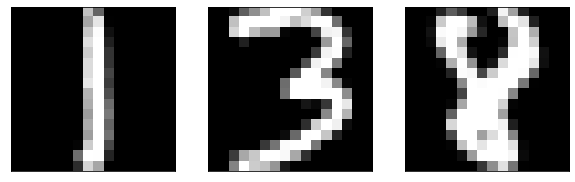

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(X.iloc[0].values.reshape(16,16), cmap='gray')
axs[1].imshow(X.iloc[40].values.reshape(16,16), cmap='gray')
axs[2].imshow(X.iloc[80].values.reshape(16,16), cmap='gray')
# off the axis ticks
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}')

X_train shape: (60, 256), X_test shape: (30, 256)


In [29]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_train_pca.shape

(60, 60)

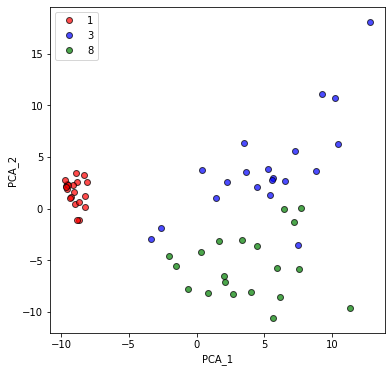

In [30]:
plt.figure(figsize=(6, 6))
plt.plot(X_train_pca[:,:1][y_train==1], X_train_pca[:,1:2][y_train==1], 'ro', alpha=0.7, markeredgecolor='k')
plt.plot(X_train_pca[:,:1][y_train==3], X_train_pca[:,1:2][y_train==3], 'bo', alpha=0.7, markeredgecolor='k')
plt.plot(X_train_pca[:,:1][y_train==8], X_train_pca[:,1:2][y_train==8], 'go', alpha=0.7, markeredgecolor='k')


plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['1','3','8'])
plt.show()

In [31]:
lda = LDA()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
X_train_lda.shape

(60, 2)

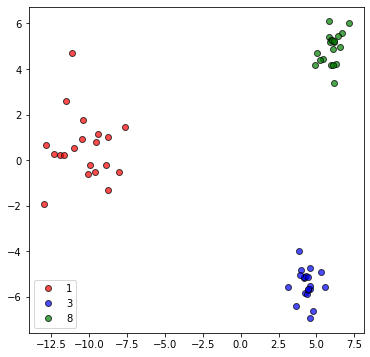

In [32]:
plt.figure(figsize=(6, 6))
plt.plot(X_train_lda[:,:1][y_train==1], X_train_lda[:,1:2][y_train==1], 'ro', alpha=0.7, markeredgecolor='k')
plt.plot(X_train_lda[:,:1][y_train==3], X_train_lda[:,1:2][y_train==3], 'bo', alpha=0.7, markeredgecolor='k')
plt.plot(X_train_lda[:,:1][y_train==8], X_train_lda[:,1:2][y_train==8], 'go', alpha=0.7, markeredgecolor='k')

plt.legend(['1','3','8'])
plt.show()

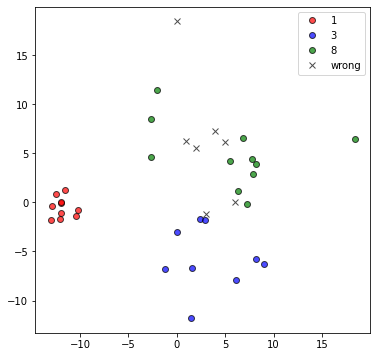

In [33]:
y_pred = lda.predict(X_test)
plt.figure(figsize=(6, 6))
plt.plot(X_test_lda[:,:1][y_pred==1], X_test_lda[:,1:2][y_pred==1], 'ro', alpha=0.7, markeredgecolor='k')
plt.plot(X_test_lda[:,:1][y_pred==3], X_test_lda[:,1:2][y_pred==3], 'bo', alpha=0.7, markeredgecolor='k')
plt.plot(X_test_lda[:,:1][y_pred==8], X_test_lda[:,1:2][y_pred==8], 'go', alpha=0.7, markeredgecolor='k')
# plt.plot(X_test_lda[:,:1][y_pred!=y_test], X_test_lda[:,1:2][y_pred!=y_test], 'kx', alpha=0.7, markeredgecolor='k')
plt.plot(X_test_lda[:,:1][y_pred!=y_test], 'kx', alpha=0.7, markeredgecolor='k')


plt.legend(['1','3','8', 'wrong'])
plt.show()


In [34]:
train_acc = lda.score(X_train, y_train)
test_acc = lda.score(X_test, y_test)
print(f'Train accuracy: {train_acc}, Test accuracy: {test_acc :.2f}')

Train accuracy: 1.0, Test accuracy: 0.77


In [35]:
qda = QDA()
qda.fit(X_train, y_train)
train_acc = qda.score(X_train, y_train)
test_acc = qda.score(X_test, y_test)
print(f'Train accuracy: {train_acc:.2f}, Test accuracy: {test_acc :.2f}')

Train accuracy: 1.00, Test accuracy: 0.57


/Users/rezachi/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [36]:
y_train_enc = pd.get_dummies(y_train).values
y_test_enc = pd.get_dummies(y_test).values
print(f'y_train_enc shape: {y_train_enc.shape}, y_test_enc shape: {y_test_enc.shape}')
input_shape = X_train.shape[1]
y_train_enc[:5], y_train[:5]

y_train_enc shape: (60, 3), y_test_enc shape: (30, 3)


(array([[0, 0, 1],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0]], dtype=uint8),
 62    8
 75    8
 27    1
 18    1
 50    3
 Name: y, dtype: int64)

In [37]:
def Model(num_neurons:list, learning_rate:float):

    model = Sequential()
    # Adding the input layer and the first hidden layer
    model.add(Dense(units = num_neurons[0], kernel_initializer = 'uniform', activation = 'relu', input_dim = input_shape))

    # Adding the hidden layers
    for i in range(1, len(num_neurons)):
        model.add(Dense(units = num_neurons[i], kernel_initializer = 'uniform', activation = 'relu'))

    # Adding the output layer
    model.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'softmax'))

    # Compiling the ANN
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate), loss = 'categorical_crossentropy', metrics = ['accuracy'])

    # Model Summary
    print(model.summary())

    return model


In [32]:
ann_viz(model, view=True, filename="./toy_asset/toy_model.gov", title="Toy Model")

In [40]:
# Tensorboard
log_dir = "logs/fit/toy_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Fitting the ANN to the Training set

model = Model([10, 20, 40, 20, 10], 0.001)
# model = Model([5, 5], 0.001)
history = model.fit(X_train, y_train_enc, batch_size = 10, epochs = 100, validation_data=(X_test, y_test_enc), callbacks=[tensorboard_callback])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                2570      
_________________________________________________________________
dense_4 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_5 (Dense)              (None, 40)                840       
_________________________________________________________________
dense_6 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 33        
Total params: 4,693
Trainable params: 4,693
Non-trainable params: 0
____________________________________________________

In [42]:
# %tensorboard --logdir logs/fit

In [19]:
# Evaluate the model on the test data using `evaluate`
score, acc = model.evaluate(X_train, y_train_enc,
                            batch_size=10)
print(f'Train score: {score: .3f}')
print(f'Train accuracy: {acc: .3f}')

# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test_enc, axis=1)

print('-----'*20)
score, acc = model.evaluate(X_test, y_test_enc,
                            batch_size=10)
print(f'Test score: {score: .3f}')
print(f'Test accuracy: {acc: .3f}')
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

6/6 [==============================] - 0s 5ms/step - loss: 2.5916e-04 - accuracy: 1.0000
Train score:  0.000
Train accuracy:  1.000
----------------------------------------------------------------------------------------------------
3/3 [==============================] - 0s 4ms/step - loss: 0.4953 - accuracy: 0.9000
Test score:  0.495
Test accuracy:  0.900


Evaluation

Text(0.5, 15.0, 'Predicted label')

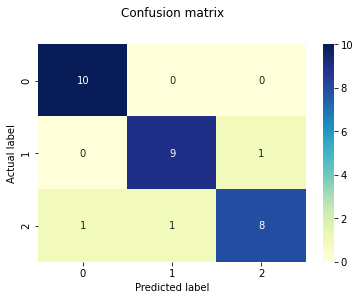

In [20]:
c_matrix = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.90      0.90      0.90        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

